# Bank Financial Loan Analysis
#### By Doreen John-Opara

#### This dataset contains the information of more than 5000 customers, based on the points that each customer has earned, a loan is offered to them. The features are:
#### Age: Customer's age in completed years
#### Experience: Years of professional experience
#### Income: Annual income of the customer
#### Zip code: Home address Zip code
#### Family: Family size of customer
#### CCAvg: Spending on credit cards per month
#### Education: Education level (Undergraduate=1, Graduate= 2, Advanced=3)
#### Mortgage: Value of house mortgage if any
#### Securityaccount: Does the customer have a securities account with this bank?
#### Cd_account: Does the customer have a certificate of deposit (CD) account with this bank?
#### Online: Does the customer use internet banking facilities?
#### Creditcard: Does the customer use a credit card issued by Universal Bank?
#### Personalloan: Did this customer accept the personal loan offered in the last campaign?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

In [2]:
df = pd.read_csv('/Users/user/Documents/DATA ANALYST PROJECT/Bank_Personal_Loan_Modelling_edited.csv')
df.head()

,ID_,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


## Data Preprocessing

In [3]:
# Shape of data

df.shape

(5000, 14)

In [4]:
# checking null values

df.isnull().sum()

ID_                   0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Determine the available column

df.columns

Index(['ID_', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
# Dropping unnecessary column

df.drop(['ID_', 'ZIP Code'], axis = 1, inplace = True)

In [7]:
# Checking to confirm columns have been dropped

df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1/60,1,0,0,1,0,0,0
1,45,19,34,3,1/50,1,0,0,1,0,0,0
2,39,15,11,1,1/00,1,0,0,0,0,0,0
3,35,9,100,1,2/70,2,0,0,0,0,0,0
4,35,8,45,4,1/00,2,0,0,0,0,0,1


In [8]:
# Data type

df.dtypes

Age                    int64
Experience             int64
Income                 int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [9]:
# Generating a summary for the dataset

data_summary = df[['Age', 'Experience', 'Income', 'Family', 'Education']].describe()
data_summary

,Age,Experience,Income,Family,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000
std,11.463166,11.467954,46.033729,1.147663,0.839869
min,23.000000,-3.000000,8.000000,1.000000,1.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000


## Subplot of the Summary

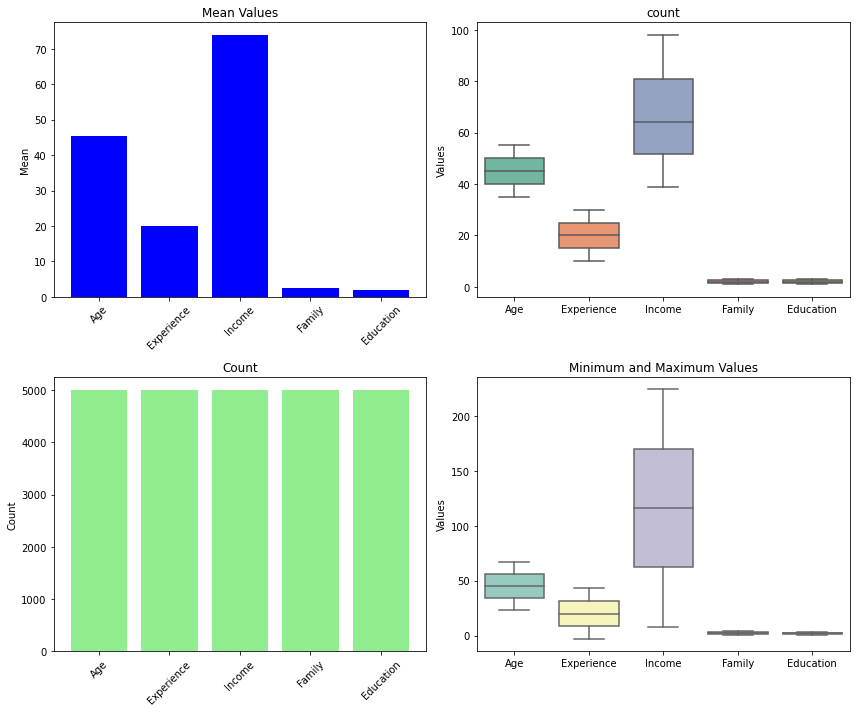

In [10]:
# creating subplots for multiple vizualization
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(12,10))

# Bar plot for mean values
axes[0, 0].bar(data_summary.columns, data_summary.loc['mean'], color = 'blue')
axes[0, 0].set_title('Mean Values')
axes[0, 0].set_ylabel('Mean')
axes[0, 0].tick_params(axis = 'x', rotation = 45)

# Box plot for quartiles
sns. boxplot(data = data_summary.loc[['25%', '50%', '75%']], ax = axes[0, 1], palette = 'Set2')
axes[0, 1].set_title('count')
axes[0, 1].set_ylabel('Values')

# Histogram for count

axes[1, 0].bar(data_summary.columns, data_summary.loc['count'], color = 'lightgreen')
axes[1, 0].set_title('Count')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis = 'x', rotation = 45)

# Box plot for min and Max
sns.boxplot(data = data_summary.loc[['min', 'max']], ax = axes[1, 1], palette = 'Set3')
axes[1, 1].set_title('Minimum and Maximum Values')
axes[1, 1].set_ylabel('Values')

# Adjust Layout and show plots

plt.tight_layout()
plt.show()



## Calculating the Skewness of the Numerical Columns

In [11]:
numeric_columns = ['Age', 'Experience', 'Income','Income', 'Family', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
numeric_df = df[numeric_columns].select_dtypes(include = 'number')
skewness = numeric_df.skew()
skewness

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Income                0.841339
Family                0.155221
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

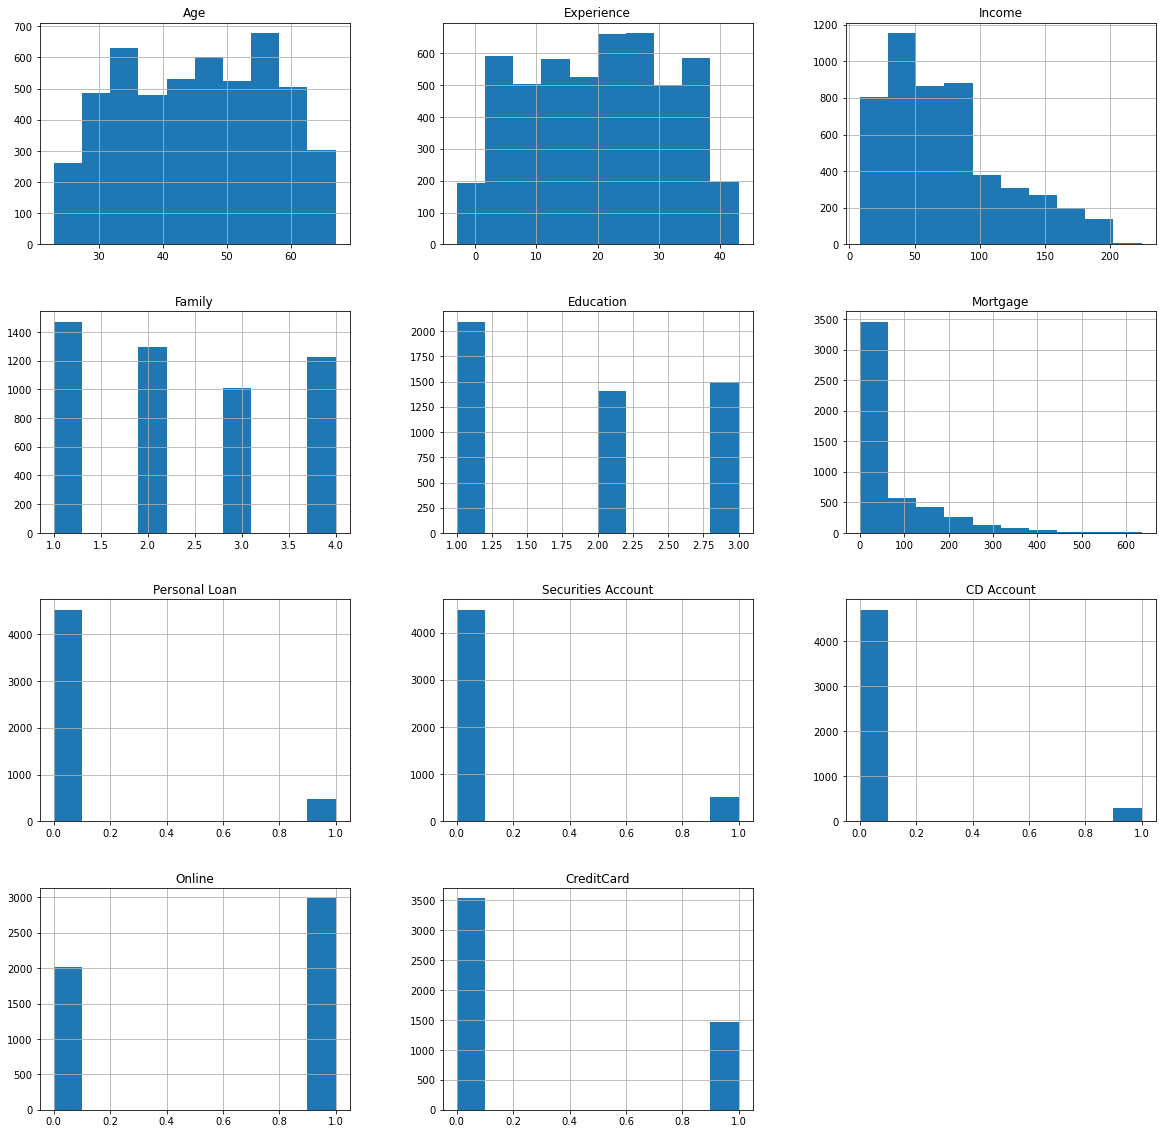

In [12]:
# creating histograms for each column

df.hist(figsize = (20,20))
plt.show()

### creating a displot for 'Experience' column

<Figure size 1152x1152 with 0 Axes>

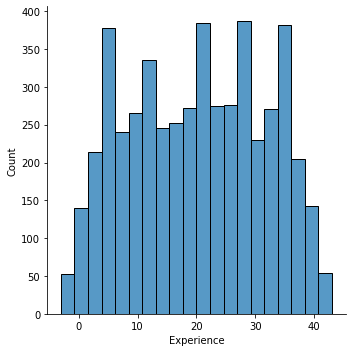

In [13]:
plt.figure(figsize = (16, 16))
sns.displot(df['Experience'])
plt.show()

In [14]:
# This means that people with 20 to 30 years of experience can take personal loan with the mean being 20.1046

### Negative Data in Experience Column

In [15]:
negative_exp = df[df['Experience'] < 0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2/30,3,0,0,0,0,0,1
226,24,-1,39,2,1/70,2,0,0,0,0,0,0
315,24,-2,51,3,0/30,3,0,0,0,0,1,0
451,28,-2,48,2,1/75,3,89,0,0,0,1,0
524,24,-1,75,4,0/20,1,0,0,0,0,1,0


In [16]:
# Total number of negative data

negative_exp.shape

(52, 12)

In [17]:
# This means that there are 52 persons with a negative experience record which is impossible and possibly an error as professsional experiences can only be positive.
# so, we will use absolute function

df['Experience'] = df['Experience'].abs()
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

<Figure size 1152x1152 with 0 Axes>

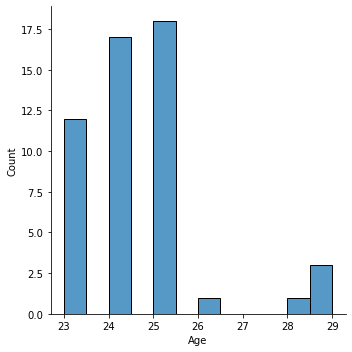

In [18]:
# creating a distribution plot (displot) for the 'Age' column

plt.figure(figsize = (16, 16))
sns.displot(negative_exp['Age'])
plt.show()

In [19]:
# This means that people that are netween 23 to 30 years of age has negative professional experience

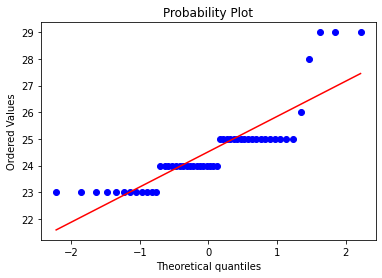

In [20]:
# Creating a probability plot for the Age Column

res = scipy.stats.probplot(negative_exp['Age'].values.reshape(-1), plot = plt)

In [21]:
# Mean Count of the Negative Experience data

negative_exp['Experience'].mean()

-1.4423076923076923

In [22]:
# Percentage Negative Experience

percentage = (len([negative_exp['Experience'].mean()]) / len(negative_exp)) * 100
percentage

1.9230769230769231

In [23]:
# size of the Negative Experience data

negative_exp.size

624

In [24]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size, percentage))

There are 624 records which has negative values for experience, approx 1.9230769230769231 %


### Creating a copy of Dataframe df and assigning it to a new variable 

In [25]:
leap = df.copy()
leap

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1/60,1,0,0,1,0,0,0
1,45,19,34,3,1/50,1,0,0,1,0,0,0
2,39,15,11,1,1/00,1,0,0,0,0,0,0
3,35,9,100,1,2/70,2,0,0,0,0,0,0
4,35,8,45,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,3,0/50,2,0,0,0,0,1,0


In [26]:
leap = df.replace('/','.', regex=True)
leap["CCAvg"] = leap["CCAvg"].astype(float)
leap

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## Using Numpy to replace values in the Experience column of the dataframe 'leap' with the mean of the 'Experience' column where the original values are less than 0

In [27]:
leap['Experience'] = np.where(leap['Experience'] < 0, leap['Experience'].mean(), leap['Experience'])

In [28]:
# Filter rows in the dataframe 'leap' where the Experience column has negative values

leap[leap['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [29]:
# Calculating the correlation Matrix

leap.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.012806,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.006621,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.237418,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,0.001628,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.012806,-0.006621,0.237418,0.001628,1.000000,-0.067658,0.039709,0.141335,0.010233,0.062352,-0.003596,0.004569
Education,0.041334,0.013919,-0.187524,0.064929,-0.067658,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.039709,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.141335,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.010233,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.062352,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

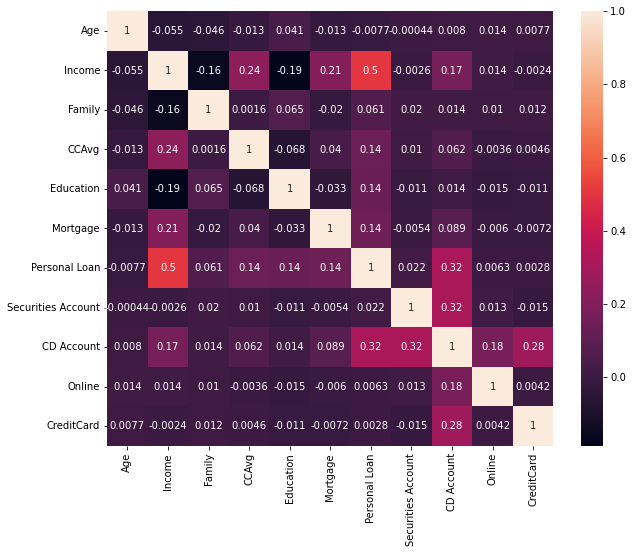

In [52]:
plt. figure(figsize = (10, 8))
sns.heatmap(leap.corr(), annot = True)

#### This shows that the correlation between Age and Experience is very strong indicating a similarilty between the two variables. Hence, we would be dropping one of the two columns in the dataset to avoid potential multicollinearity issues. 

In [31]:
# Dropping the Experience column from Dataframe 'leap' 

leap = leap.drop(['Experience'], axis = 1)
leap.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### Checking Unique value in Education column

In [32]:
leap['Education'].unique()

array([1, 2, 3])

In [33]:
# Defining a function called experience(x) that takes in a input x

def experience(x):
    if x == 1:
        return "Undergraduate"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Postgraduate"


In [34]:
# Applying the experience column to create a new column "Education Level"

leap['Educational Level'] = leap['Education'].apply(experience)
leap.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Educational Level
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [35]:
leap['Educational Level'].unique()

array(['Undergraduate', 'Graduate', 'Postgraduate'], dtype=object)

### Grouping Dataframe "leap" by the "Educational Level" column and then calculating the sum of the Age column within each group

In [36]:
education = leap.groupby('Educational Level')['Age'].sum()
education

Educational Level
Graduate         63191
Postgraduate     69257
Undergraduate    94244
Name: Age, dtype: int64

### Creating a pie chart to visualize the ditribution of education categories based on the 'Educational level' column

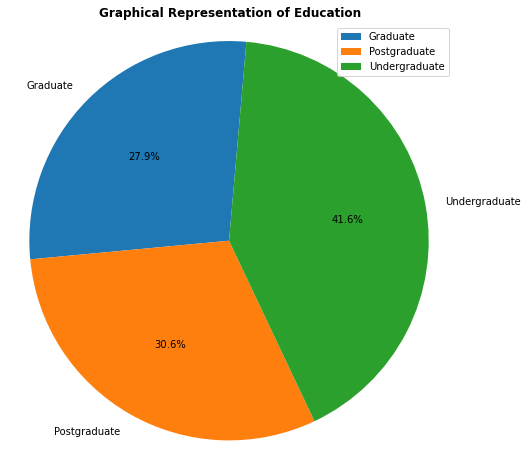

In [51]:
plt.figure(figsize = (8,8))
plt.pie(education, labels = education.index, autopct = '%1.1f%%', startangle = 85)
plt.axis('equal')
plt.title('Graphical Representation of Education', fontweight = 'bold')
plt.legend(education.index, loc='upper right')
plt.show()

In [38]:
# Count the occurenece of unique values in the 'Securities Account' column of Dataframe 'leap'

leap['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [39]:
# Count the occurenece of unique values in the 'CD Account' column of Dataframe 'leap'

leap['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [40]:
# Count the occurenece of unique values in the 'Personal Loan' column of Dataframe 'leap'

leap['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [41]:
# Defining a function called security(s) that takes in an input and categorizes individuals into different group based on the 'securities Account' and 'CD Account' values.

def security(s):
    if (s['Securities Account']==1) & (s['CD Account']==1):
        return "Both Security and Deposit Account"
    if (s['Securities Account']==1) & (s['CD Account']==0):
        return"Only Security Account"
    if (s['Securities Account']==0) & (s['CD Account']==1):
        return "only Deposit Account"
    if (s['Securities Account']==0) & (s['CD Account']==0):
        return "No Account"

In [42]:
# Applying the security function to the dataframe 'leap' using the apply method to create a new column titled Account Holder.

leap['Account Holder'] = leap.apply(security, axis = 1)

leap.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Educational Level,Account Holder
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate,Only Security Account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate,Only Security Account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate,No Account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,No Account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,No Account


In [43]:
# Count the occurenece of unique values in the 'Account Holder' column of Dataframe 'leap'

account = leap['Account Holder'].value_counts()
account

No Account                           4323
Only Security Account                 375
only Deposit Account                  155
Both Security and Deposit Account     147
Name: Account Holder, dtype: int64

### Creating a pie chart to visualize the ditribution of Account based on the 'Account Holder' column 

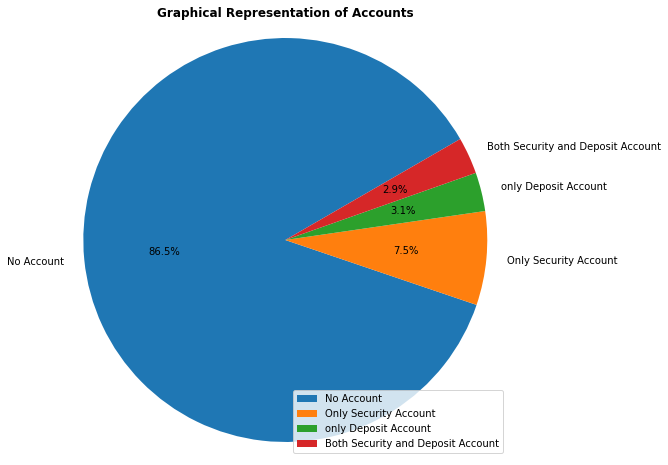

In [50]:
plt.figure(figsize = (8,8))
plt.pie(account, labels = account.index, autopct = '%1.1f%%', startangle = 30)
plt.axis('equal')
plt.title('Graphical Representation of Accounts', fontweight = 'bold')
plt.legend(account.index, loc='lower right')
plt.show()

### Creating two seperate boxplot column for the "personal Loan" column to provide a visual summary of the data.

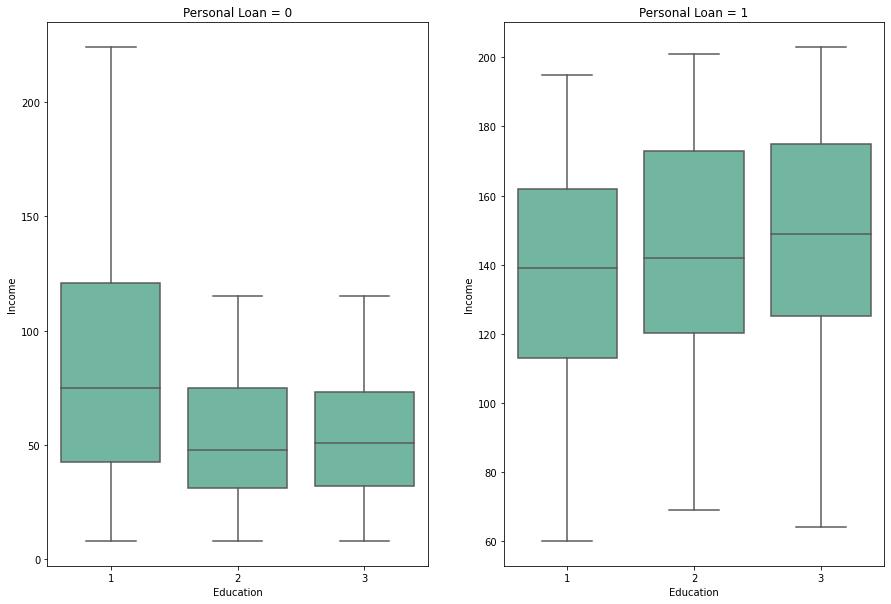

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))

# First boxplot for 'Personal Loan' = 0
sns.boxplot(data = leap[leap['Personal Loan'] == 0], x = 'Education', y = 'Income', hue = 'Personal Loan', ax=axes[0], palette = 'Set2')
axes[0].set_title('Personal Loan = 0')
axes[0].legend().set_visible(False)

# First boxplot for 'Personal Loan' = 1
sns.boxplot(data = leap[leap['Personal Loan'] == 1], x = 'Education', y = 'Income', hue = 'Personal Loan', ax=axes[1], palette = 'Set2')
axes[1].set_title('Personal Loan = 1')
axes[1].legend().set_visible(False)

plt.show()

### Creating a Kernel Density Estimation (KDE) plot to visualize the distribution of income for two groups: Individual with no personal loan and idividual with person loan

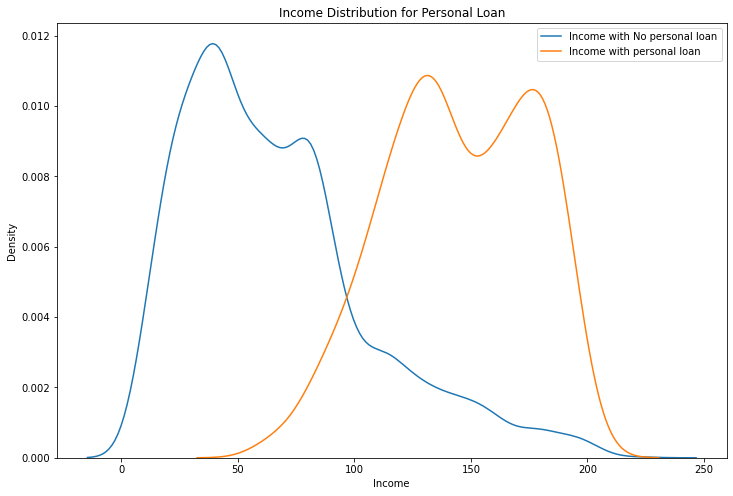

In [46]:
plt.figure(figsize = (12, 8))
sns.kdeplot(data = leap[leap['Personal Loan'] == 0]['Income'], label = 'Income with No personal loan')
sns.kdeplot(data = leap[leap['Personal Loan'] == 1]['Income'], label = 'Income with personal loan')
plt.title("Income Distribution for Personal Loan")
plt.xlabel("Income")
plt.ylabel("Density")
plt.legend()
plt.show()

###### The plot shows that individuals with a personal loan usually exhibits a salary range spanning from a minimum of 50,000 to a maximum of 200,000. Among those that opted for a personal loan, majority falls within the income bracket of 100,000 to 150,000 which indicates a peak in loan application within this salary range.

## Creating a Kernel Density Estimation (KDE) plot to visualize the distribution of CCAvg for two groups: Credit card average based on presence and absence personal loan

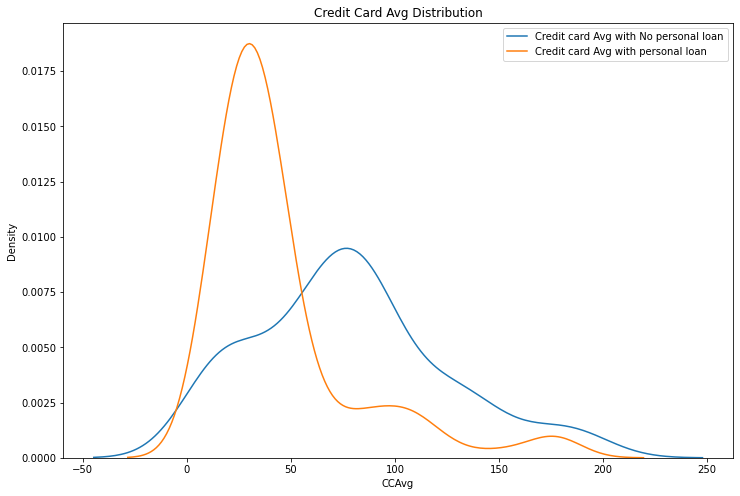

In [47]:
plt.figure(figsize = (12, 8))
sns.kdeplot(data = leap[leap['CCAvg'] == 0]['Income'], label = 'Credit card Avg with No personal loan')
sns.kdeplot(data = leap[leap['CCAvg'] == 1]['Income'], label = 'Credit card Avg with personal loan')
plt.title("Credit Card Avg Distribution")
plt.xlabel("CCAvg")
plt.ylabel("Density")
plt.legend()
plt.show()

###### The plot shows that individuals with a personal loan usually exhibits a credit card Average spanning from a minimum of 25,000 to a maximum of 200,000. Among those that opted for a personal loan, majority has a credit card average ranging from 25,000 to 75,000 which indicates a peak in loan application amongst individual with that amount of Spending on credit cards .

### Defining a list called "link" containing four column names: "Securities Account", "Online", "Account Holder", "CreditCard"

In [48]:
link = ["Securities Account", "Online", "Account Holder", "CreditCard"]

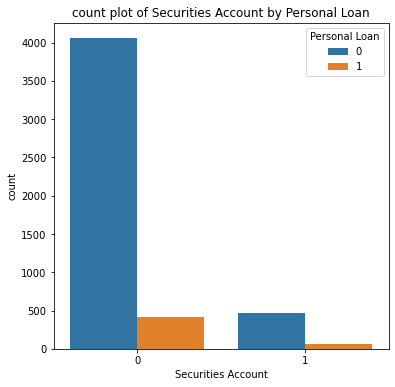

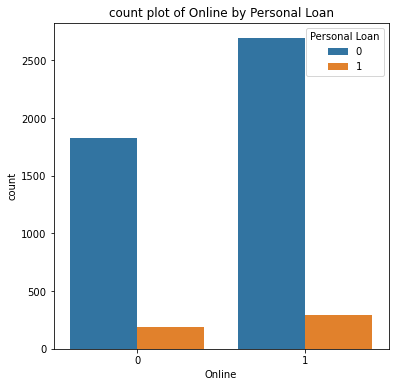

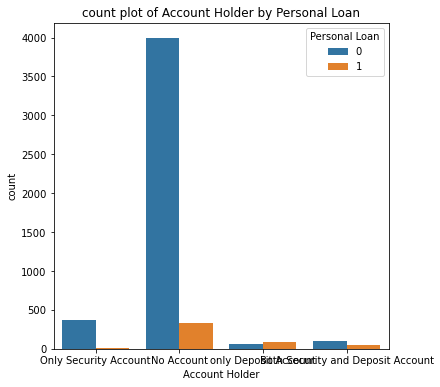

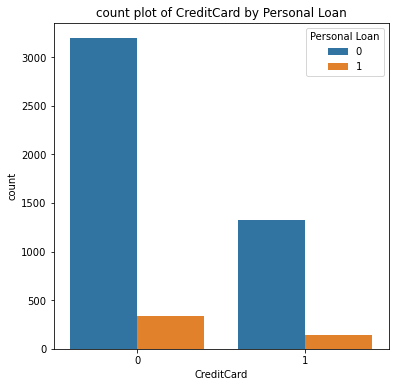

In [49]:
for i in link:
    plt.figure(figsize =(6,6))
    sns.countplot(x = i, data = leap, hue = 'Personal Loan')
    plt.title(f'count plot of {i} by Personal Loan')
    plt.show()